In [3]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

df1 = pd.read_csv('C:/Users/Bojana/Desktop/MASINSKO UCENJE/III projekat/train.csv', sep=',',skipinitialspace=True)
df2 = pd.read_csv('C:/Users/Bojana/Desktop/MASINSKO UCENJE/III projekat/test.csv', sep=',',skipinitialspace=True)

df = pd.DataFrame(pd.concat([df1,df2]))

df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [4]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


[]

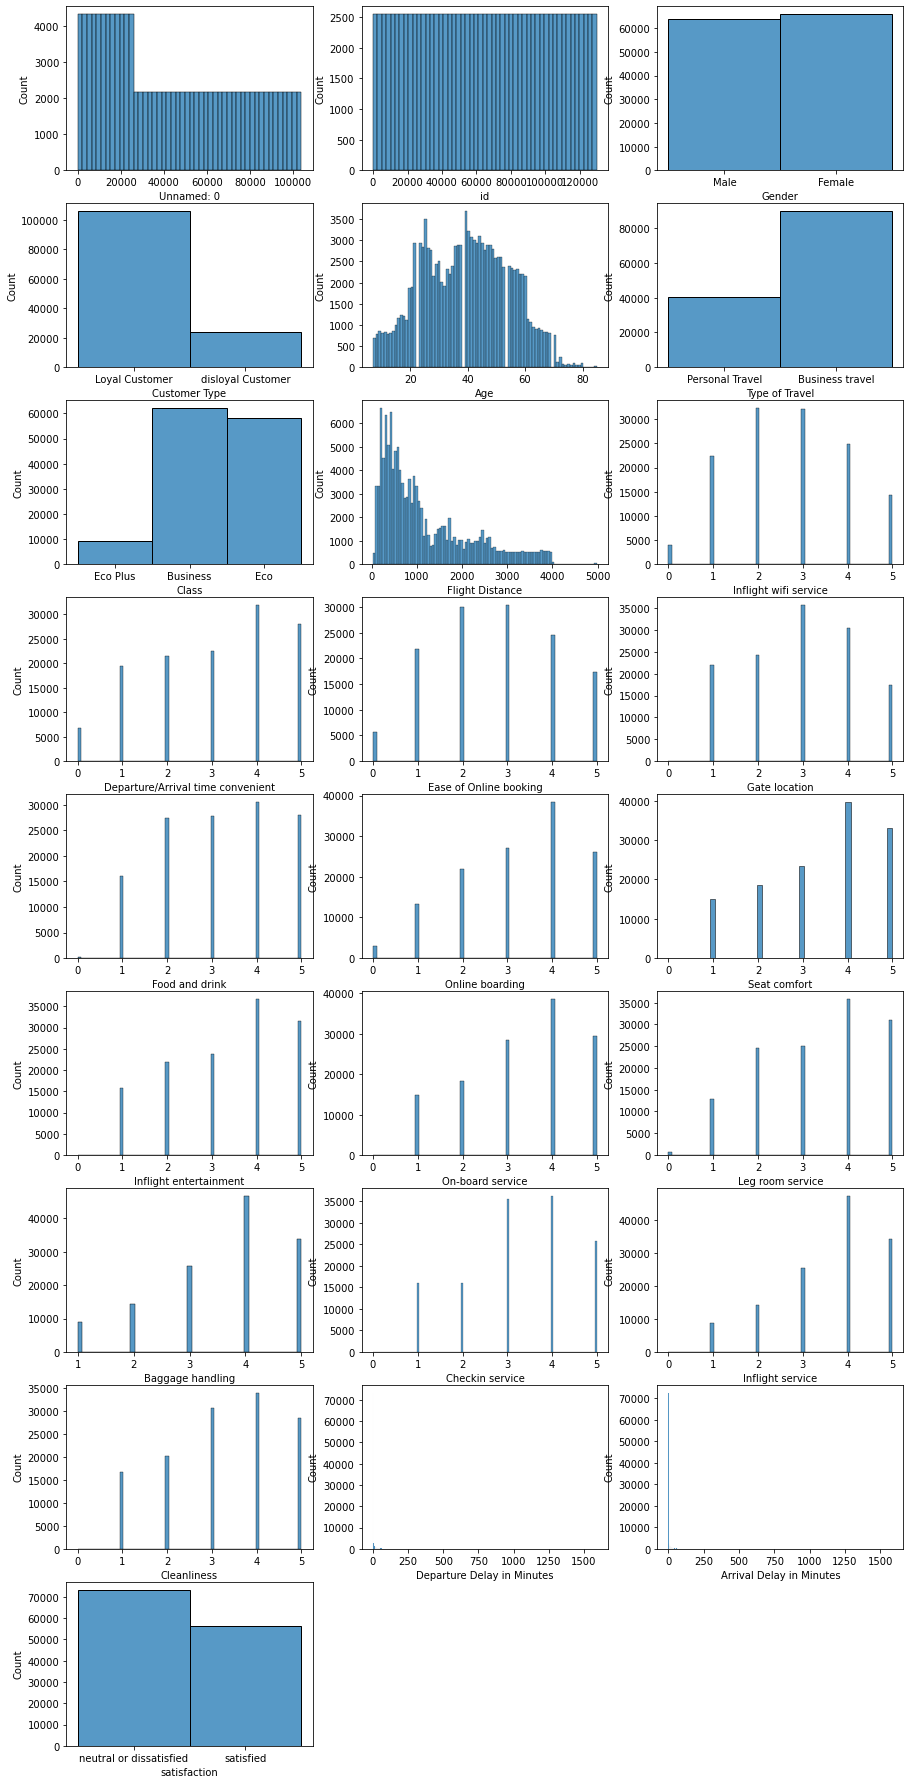

In [5]:
plt.figure(figsize=(15,32))

for i, column in enumerate(df.columns):
    plt.subplot(9,3,i+1)
    sb.histplot(df[column])
    
plt.plot()

<AxesSubplot:xlabel='Departure Delay in Minutes'>

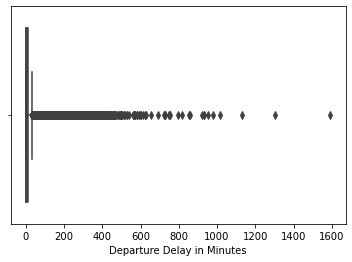

In [6]:
sb.boxplot(data=df, x='Departure Delay in Minutes')

<AxesSubplot:xlabel='Arrival Delay in Minutes'>

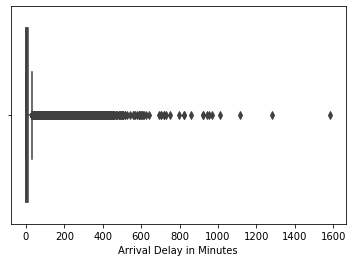

In [7]:
sb.boxplot(data=df, x='Arrival Delay in Minutes')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      12988

In [9]:
df = df.drop('Unnamed: 0',axis=1)
df = df.drop('id',axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    12988

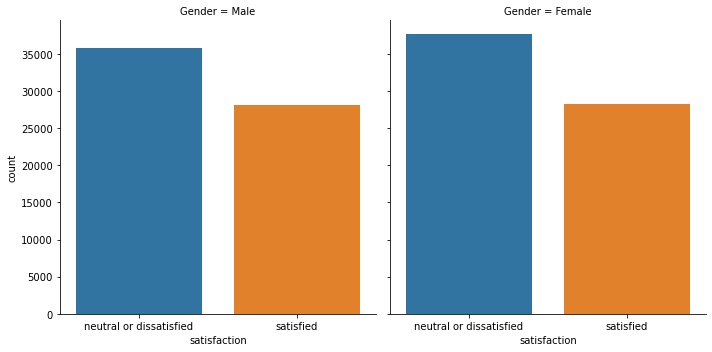

In [10]:
sb.catplot(x="satisfaction", col="Gender", col_wrap=2, data=df, kind="count")  

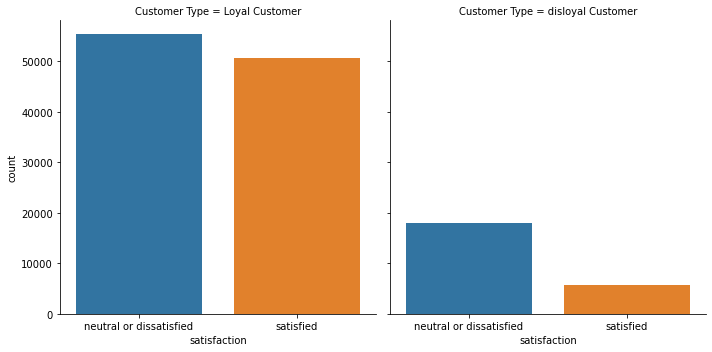

In [11]:
sb.catplot(x="satisfaction", col="Customer Type", col_wrap=2, data=df, kind="count")  

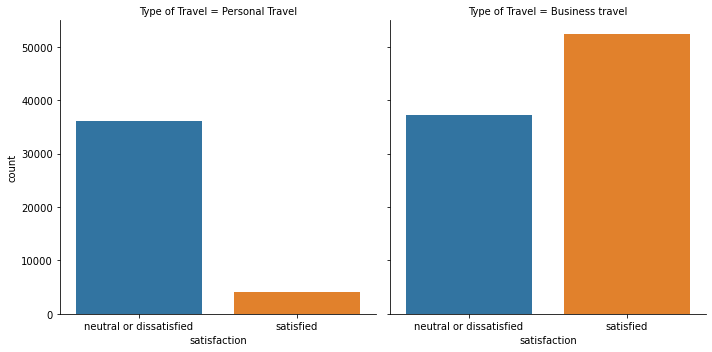

In [12]:
sb.catplot(x="satisfaction", col="Type of Travel", col_wrap=2, data=df, kind="count")  

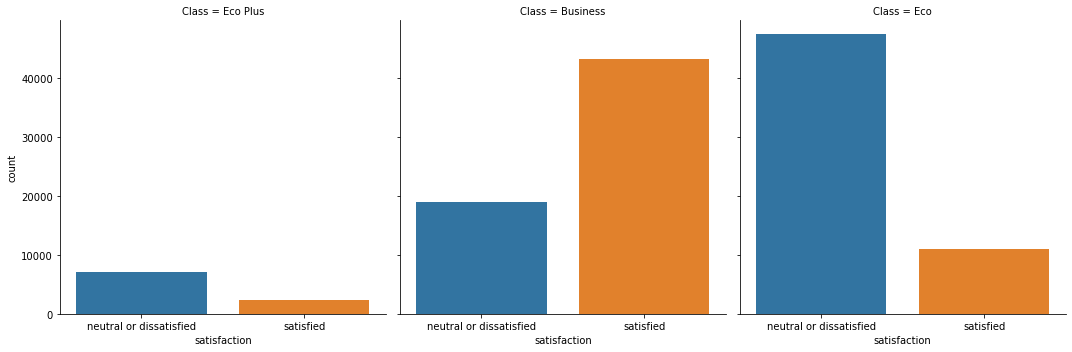

In [13]:
sb.catplot(x="satisfaction", col="Class", col_wrap=3, data=df, kind="count")  

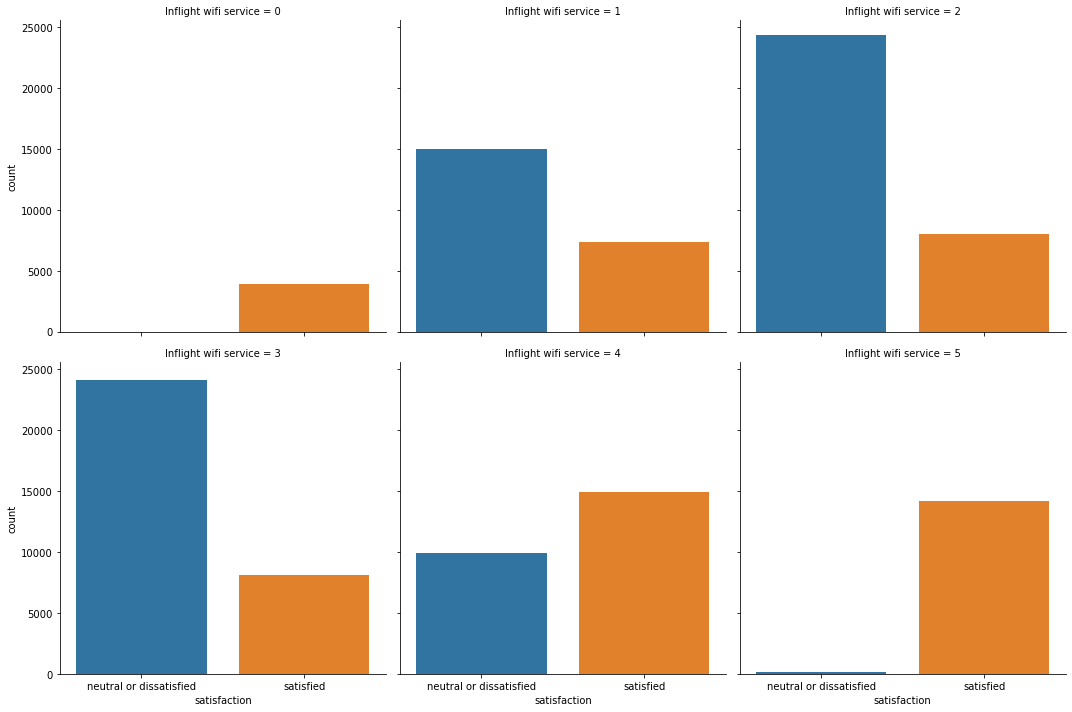

In [14]:
sb.catplot(x="satisfaction", col="Inflight wifi service", col_wrap=3, data=df, kind="count") 

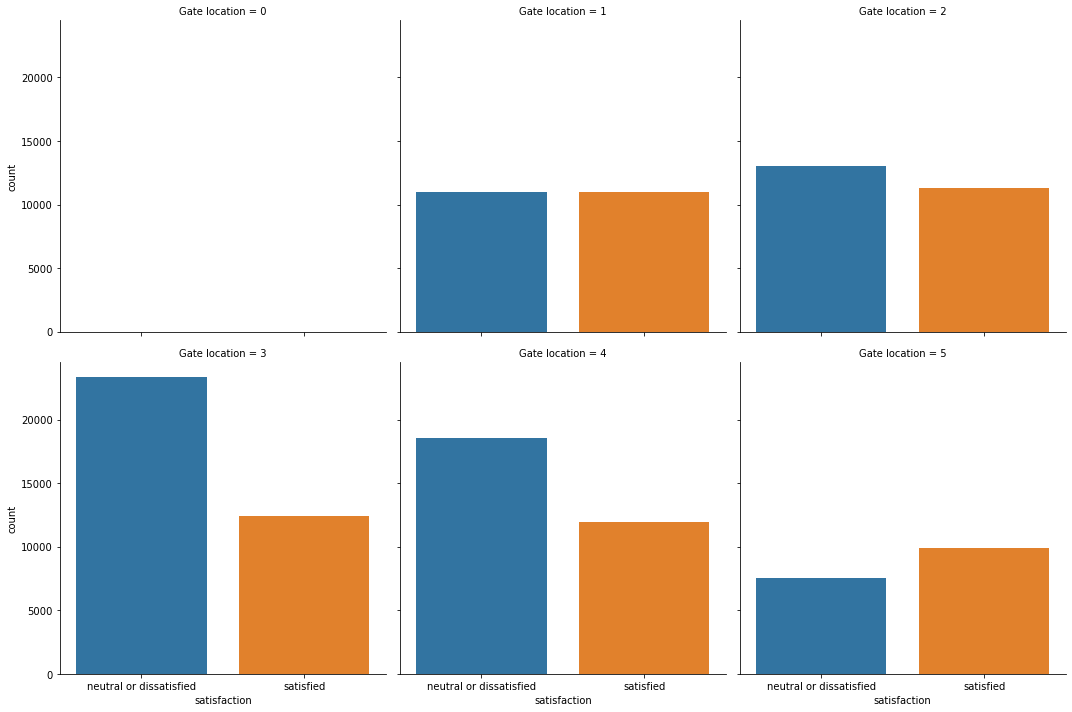

In [15]:
sb.catplot(x="satisfaction", col="Gate location", col_wrap=3, data=df, kind="count") 

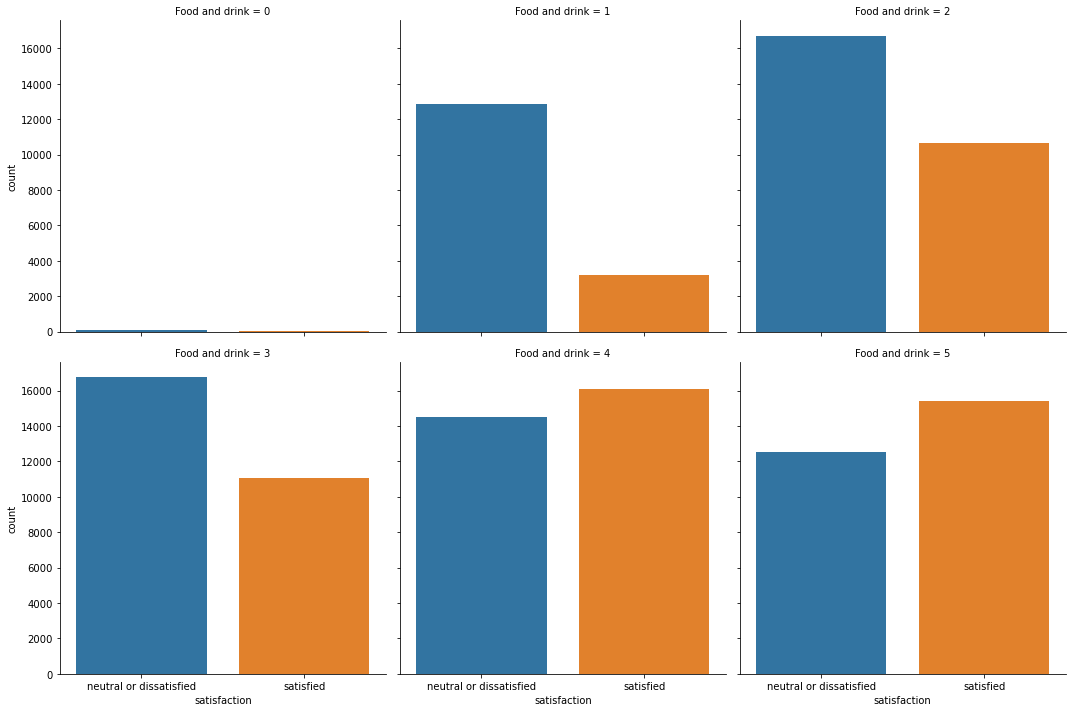

In [16]:
sb.catplot(x="satisfaction", col="Food and drink", col_wrap=3, data=df, kind="count") 

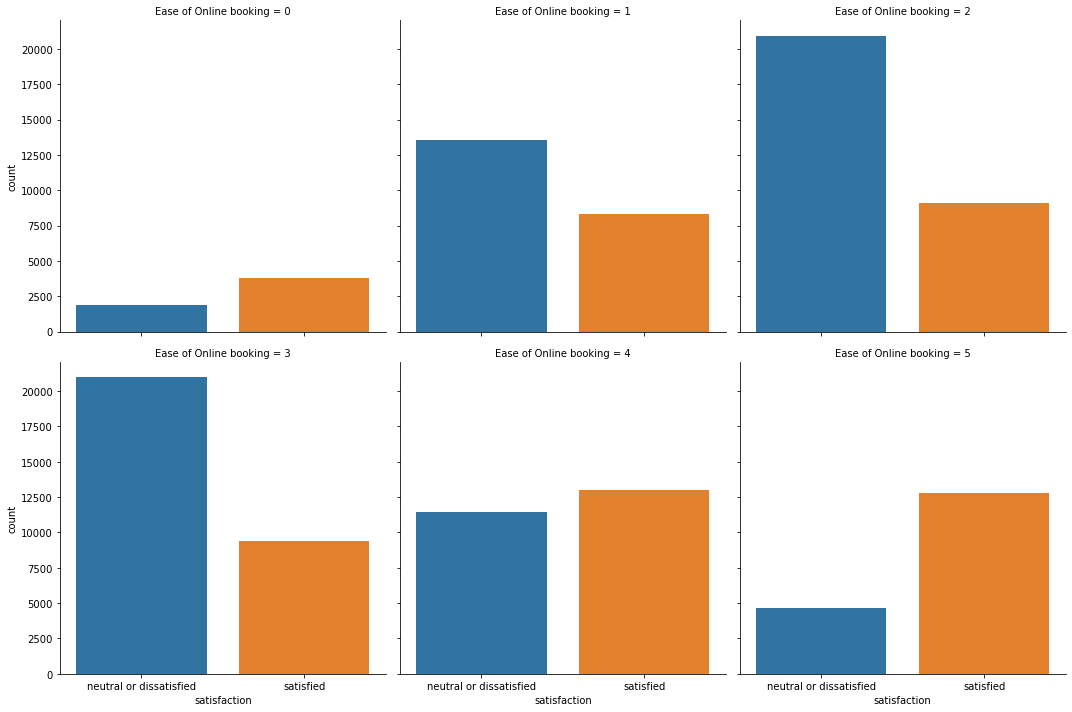

In [17]:
sb.catplot(x="satisfaction", col="Ease of Online booking", col_wrap=3, data=df, kind="count") 

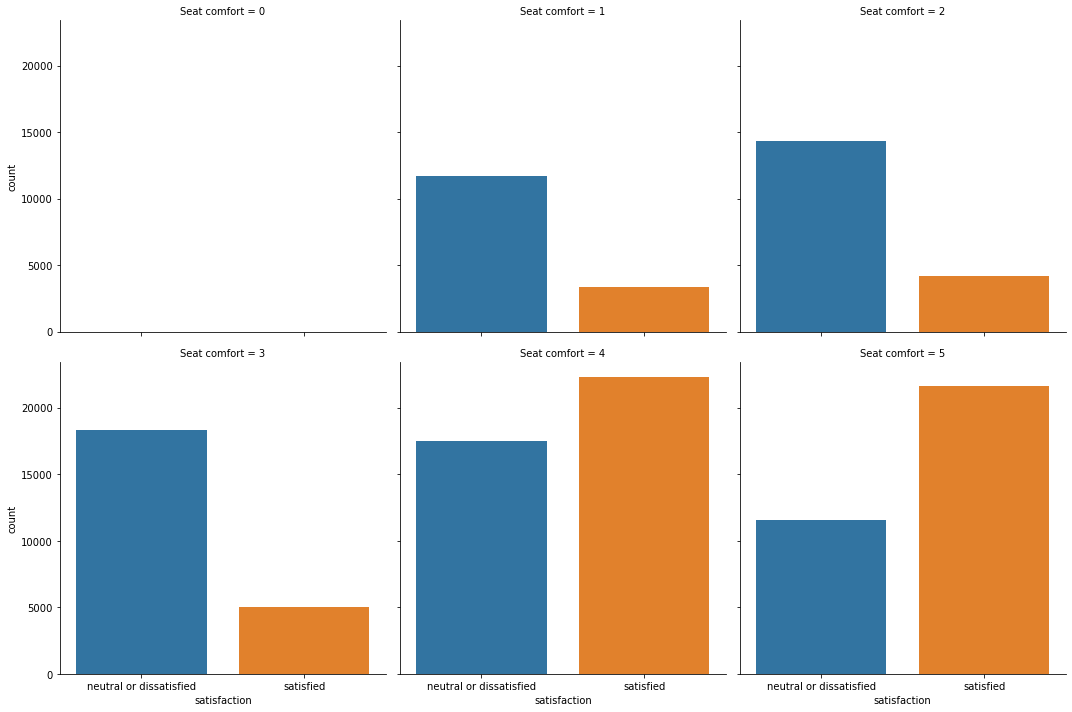

In [18]:
sb.catplot(x="satisfaction", col="Seat comfort", col_wrap=3, data=df, kind="count") 

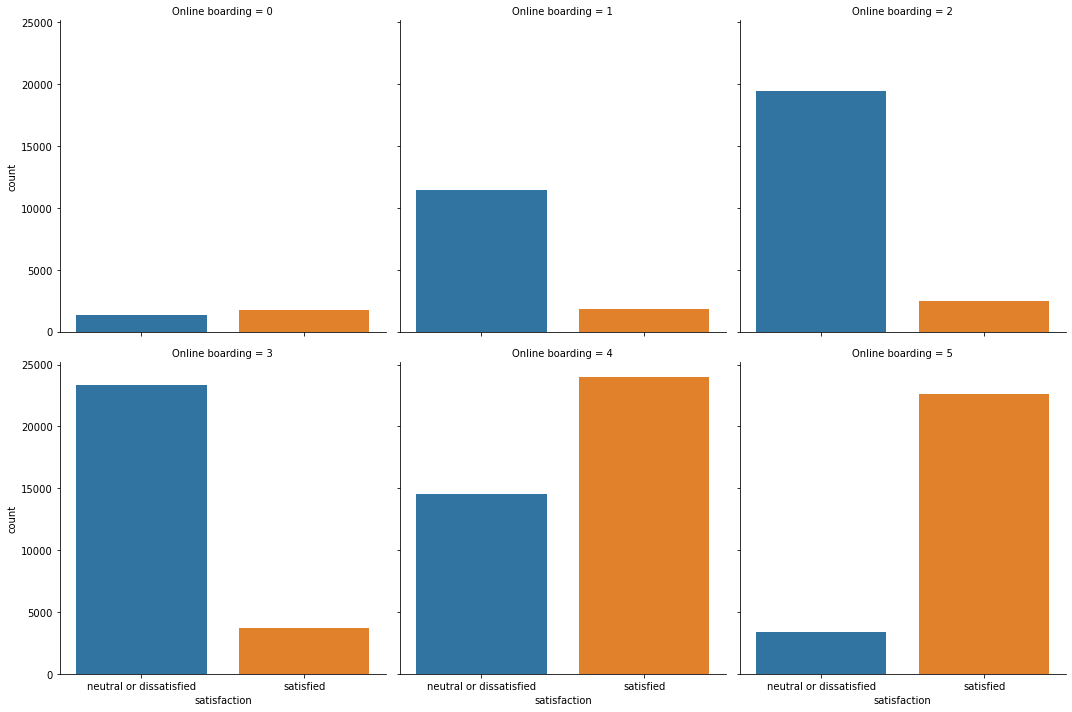

In [19]:
sb.catplot(x="satisfaction", col="Online boarding", col_wrap=3, data=df, kind="count") 

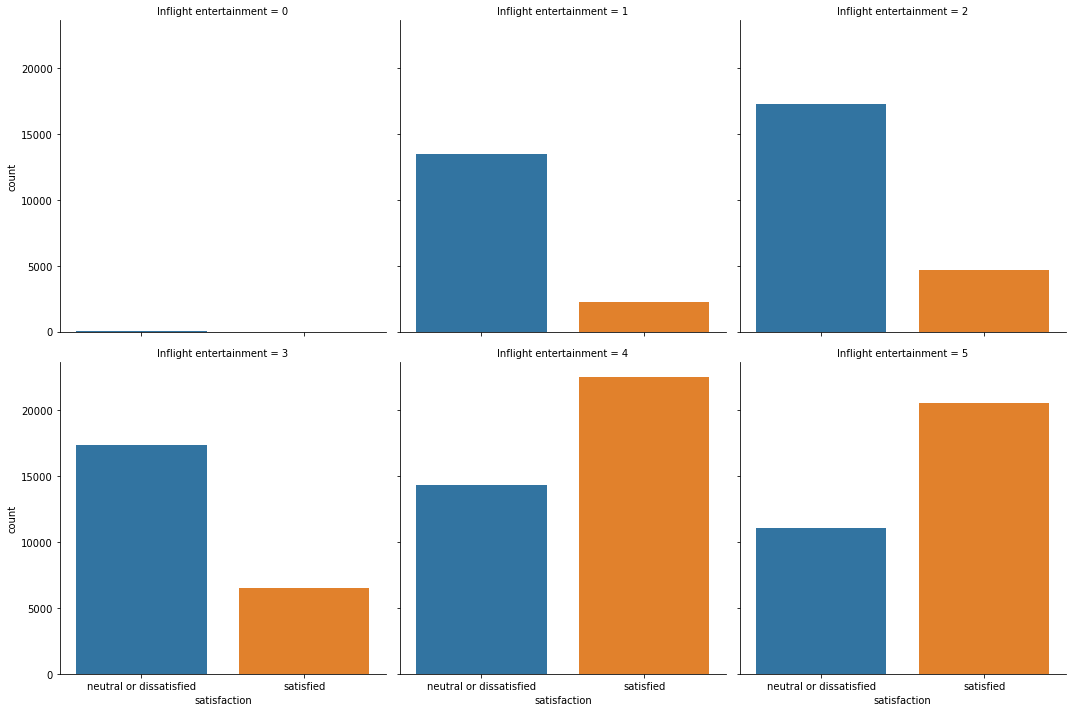

In [20]:
sb.catplot(x="satisfaction", col="Inflight entertainment", col_wrap=3, data=df, kind="count") 

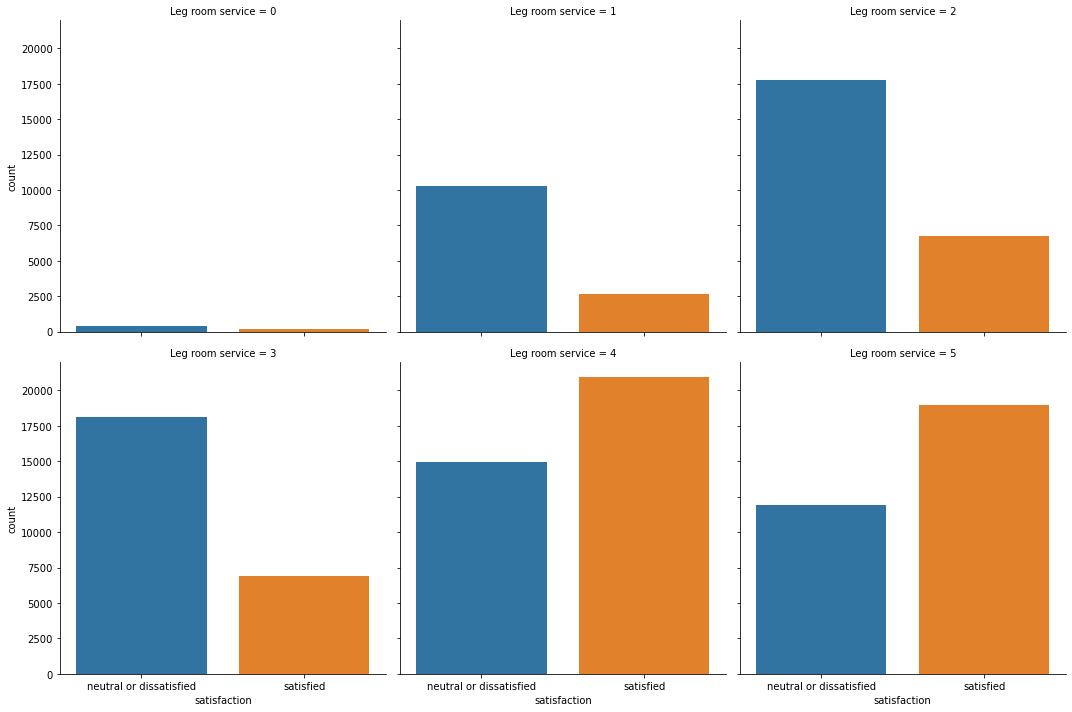

In [21]:
sb.catplot(x="satisfaction", col="Leg room service", col_wrap=3, data=df, kind="count") 

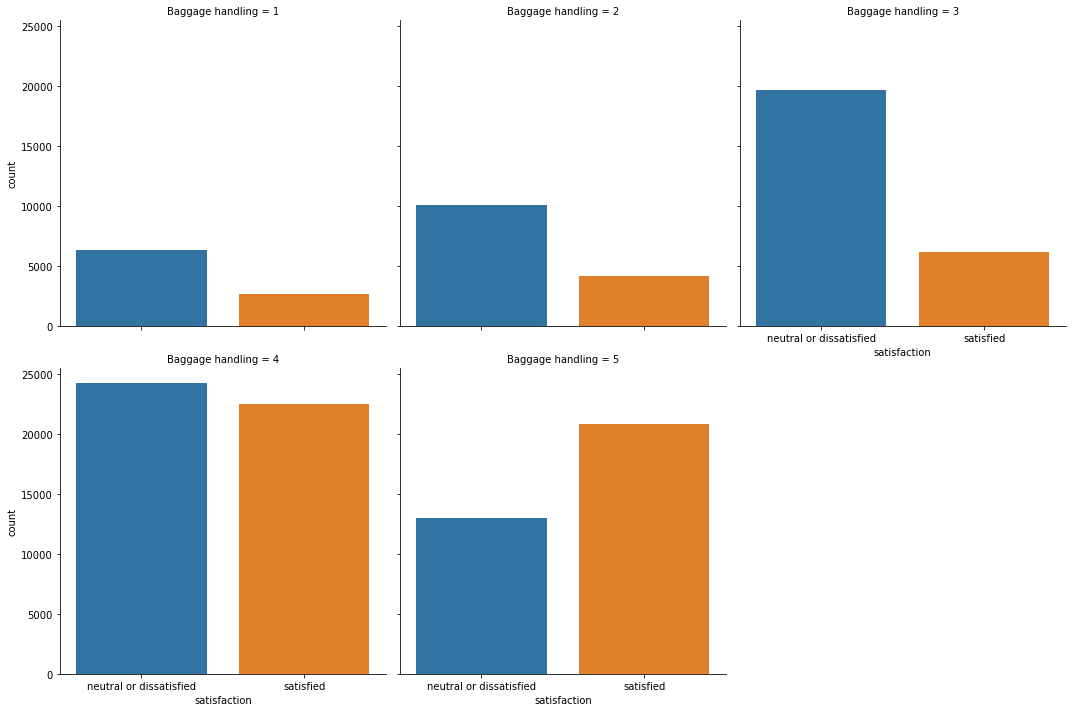

In [22]:
sb.catplot(x="satisfaction", col="Baggage handling", col_wrap=3, data=df, kind="count")

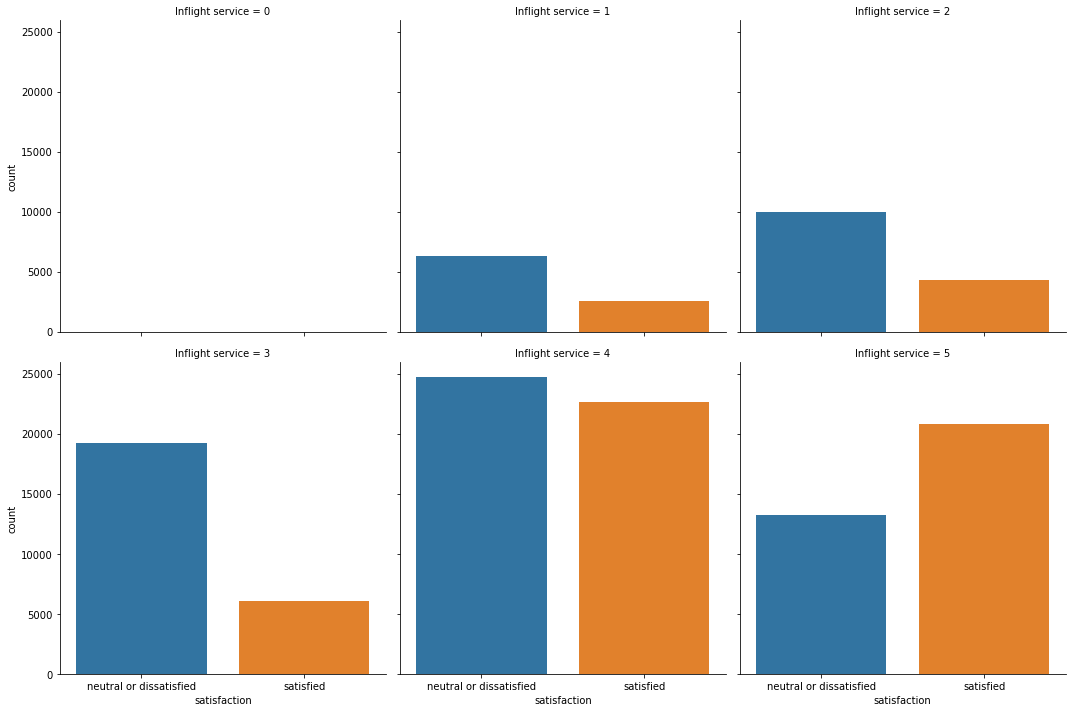

In [23]:
sb.catplot(x="satisfaction", col="Inflight service", col_wrap=3, data=df, kind="count")

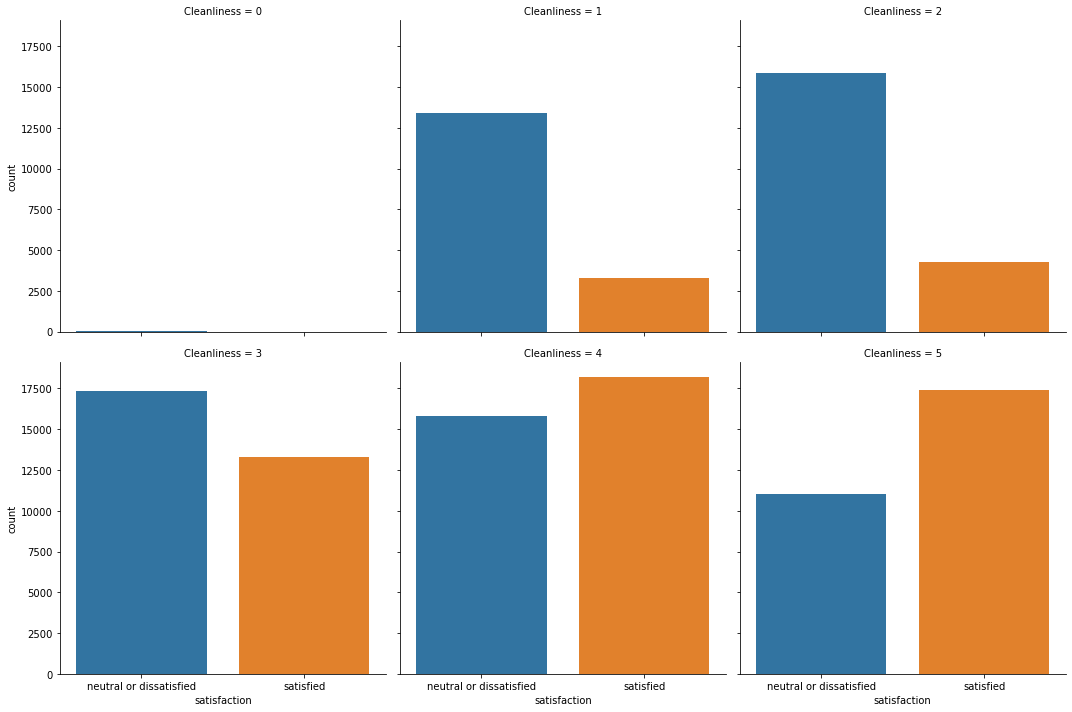

In [24]:
sb.catplot(x="satisfaction", col="Cleanliness", col_wrap=3, data=df, kind="count")

In [25]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in df.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    df[col] = lencoders[col].fit_transform(df[col])

[]

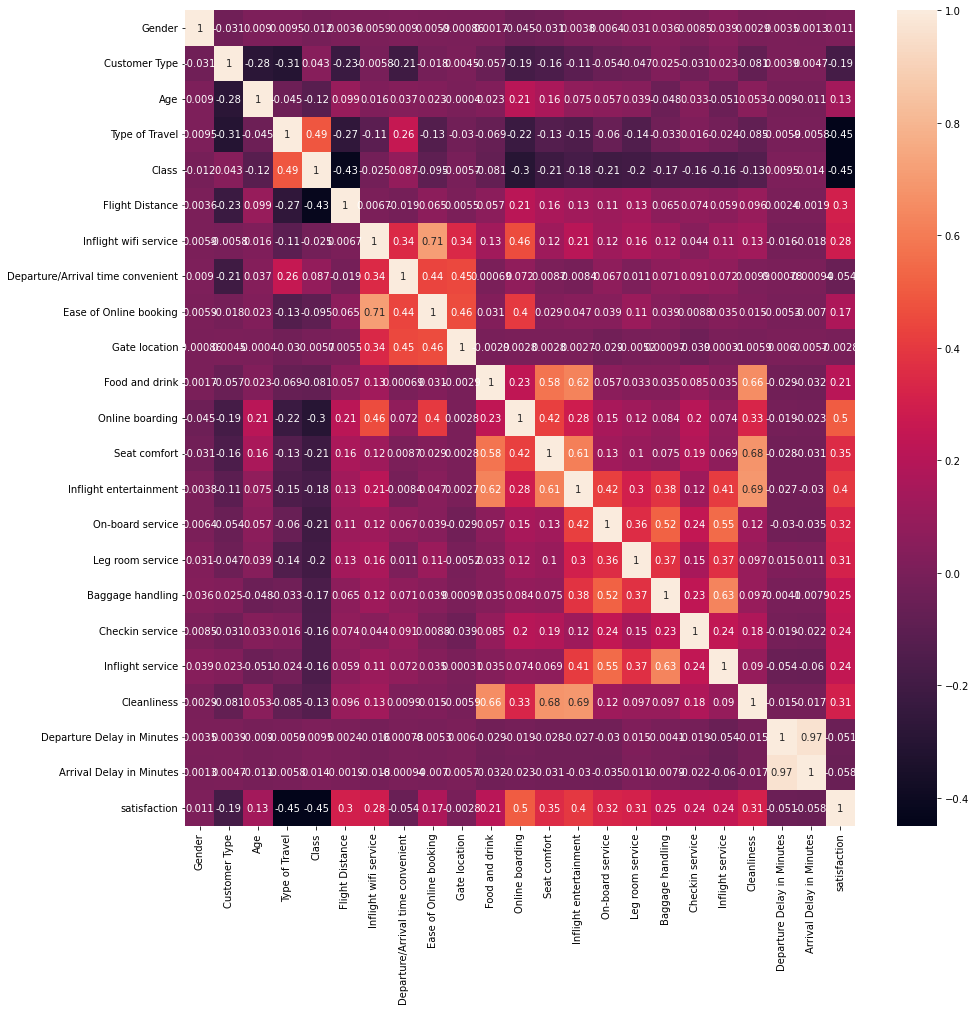

In [26]:
plt.figure(figsize=(15,15))
sb.heatmap(df.corr(),annot=True)
plt.plot()

In [27]:
df = df.drop('Gender',axis=1)
df = df.drop('Departure Delay in Minutes',axis=1)
df = df.drop('Arrival Delay in Minutes',axis=1)
df = df.drop('Gate location',axis=1)
df = df.drop('Departure/Arrival time convenient',axis=1)

print(len(df.columns))

18


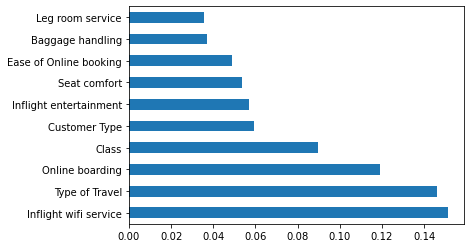

<Figure size 1080x1080 with 0 Axes>

In [28]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.figure(figsize=(15,15))
plt.show()

In [31]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


def preprocess_data(data):
    data = data.drop('Unnamed: 0',axis=1)
    data = data.drop('id',axis=1)
    data = data.drop('Gender',axis=1)
    data = data.drop('Arrival Delay in Minutes',axis=1)
    data = data.drop('Departure Delay in Minutes',axis=1)
    data = data.drop('Gate location',axis=1)
    data = data.drop('Departure/Arrival time convenient',axis=1)
    
    data['satisfaction']= data['satisfaction'].replace({'satisfied': 1, 'neutral or dissatisfied': 0})
    lencoders = {}
    for col in data.select_dtypes(include=['object']).columns:
        lencoders[col] = LabelEncoder()
        data[col] = lencoders[col].fit_transform(data[col])
        
    return data


train_data = preprocess_data(df1)
test_data = preprocess_data(df2)

scaler = StandardScaler()

x_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:,-1]

x_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

print((x_train.shape))

(103904, 17)


In [32]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(128, input_dim=17, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2304      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,625
Trainable params: 10,625
Non-trainable params: 0
_________________________________________________________________


In [33]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss'),
    tf.keras.callbacks.TensorBoard(log_dir='logs')
]

results = model.fit(x_train,y_train,epochs=200, batch_size=8, callbacks=callbacks, validation_split=0.2)

Epoch 1/200
10391/10391 [==============================] - 14s 1ms/step - loss: 0.1591 - accuracy: 0.9338 - val_loss: 0.1170 - val_accuracy: 0.9493
Epoch 2/200
10391/10391 [==============================] - 12s 1ms/step - loss: 0.1161 - accuracy: 0.9510 - val_loss: 0.1124 - val_accuracy: 0.9515
Epoch 3/200
10391/10391 [==============================] - 12s 1ms/step - loss: 0.1045 - accuracy: 0.9560 - val_loss: 0.1041 - val_accuracy: 0.9561
Epoch 4/200
10391/10391 [==============================] - 12s 1ms/step - loss: 0.0980 - accuracy: 0.9585 - val_loss: 0.0953 - val_accuracy: 0.9608
Epoch 5/200
10391/10391 [==============================] - 12s 1ms/step - loss: 0.0946 - accuracy: 0.9601 - val_loss: 0.0986 - val_accuracy: 0.9586
Epoch 6/200
10391/10391 [==============================] - 12s 1ms/step - loss: 0.0913 - accuracy: 0.9608 - val_loss: 0.0964 - val_accuracy: 0.9597
Epoch 7/200
10391/10391 [==============================] - 14s 1ms/step - loss: 0.0888 - accuracy: 0.9623 - val_

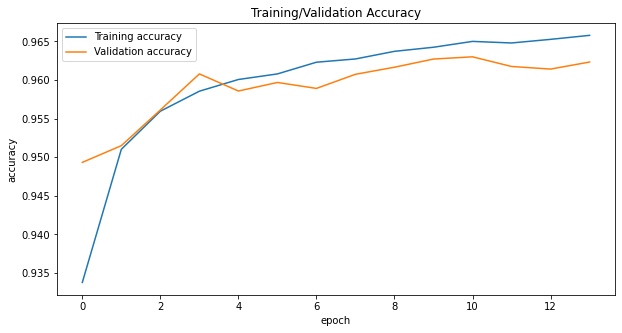

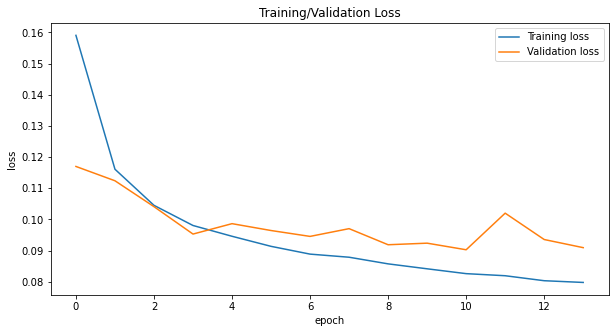

Accuracy: 0.9569987680936248
Roc area under curve: 0.9532535727995582


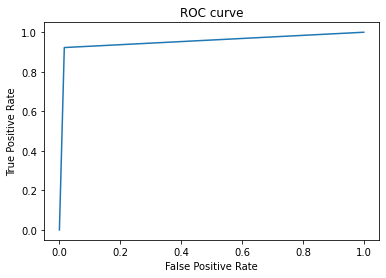

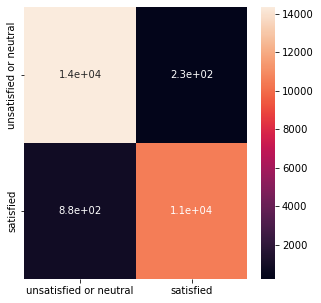

In [41]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix


pred = model.predict(x_test)
pred = np.around(pred)

def plot_model_performance(results, pred, y_test):
    plt.figure(figsize=(10,5))
    plt.title('Training/Validation Accuracy')
    plt.plot(results.history['accuracy'], label = 'Training accuracy')
    plt.plot(results.history['val_accuracy'], label = 'Validation accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.title('Training/Validation Loss')
    plt.plot(results.history['loss'], label = 'Training loss')
    plt.plot(results.history['val_loss'], label = 'Validation loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()
    print('Accuracy:',accuracy_score(y_test,pred))
    print('Roc area under curve:',roc_auc_score(y_test,pred))
    fpr,tpr,_ = roc_curve(y_test,pred)

    plt.title('ROC curve')
    plt.plot(fpr,tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    
    classes = ['unsatisfied or neutral','satisfied']
    cm = confusion_matrix(y_test,pred)
    df = pd.DataFrame(cm, index = classes, columns = classes)
    plt.figure(figsize=(5,5))
    sb.heatmap(df,annot=True)
    plt.rc('font', size=12) 
    plt.plot()
    
plot_model_performance(results,pred,y_test)

Epoch 1/200
10391/10391 [==============================] - 12s 1ms/step - loss: 0.0493 - accuracy: 0.9343 - val_loss: 0.0361 - val_accuracy: 0.9526
Epoch 2/200
10391/10391 [==============================] - 11s 1ms/step - loss: 0.0365 - accuracy: 0.9513 - val_loss: 0.0341 - val_accuracy: 0.9534
Epoch 3/200
10391/10391 [==============================] - 11s 1ms/step - loss: 0.0327 - accuracy: 0.9564 - val_loss: 0.0314 - val_accuracy: 0.9577
Epoch 4/200
10391/10391 [==============================] - 12s 1ms/step - loss: 0.0308 - accuracy: 0.9585 - val_loss: 0.0362 - val_accuracy: 0.9522
Epoch 5/200
10391/10391 [==============================] - 12s 1ms/step - loss: 0.0296 - accuracy: 0.9598 - val_loss: 0.0294 - val_accuracy: 0.9599
Epoch 6/200
10391/10391 [==============================] - 12s 1ms/step - loss: 0.0286 - accuracy: 0.9611 - val_loss: 0.0288 - val_accuracy: 0.9613
Epoch 7/200
10391/10391 [==============================] - 13s 1ms/step - loss: 0.0280 - accuracy: 0.9620 - val_

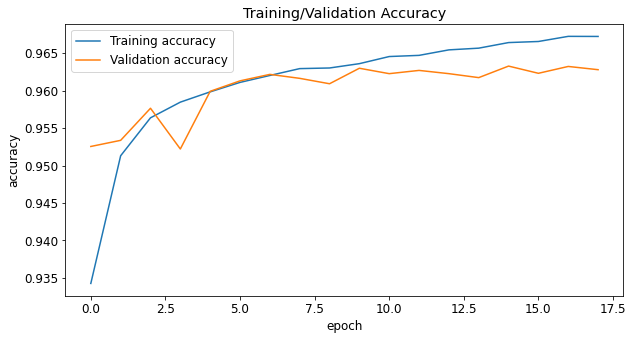

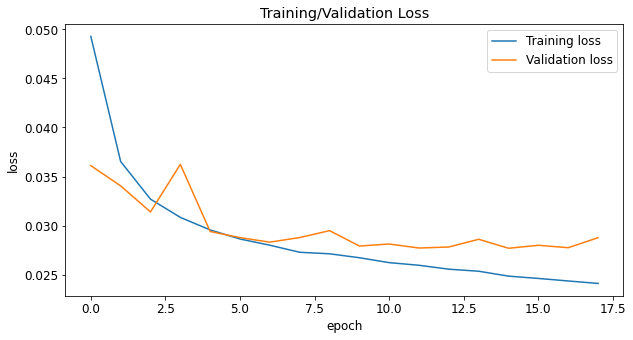

Accuracy: 0.962580843855867
Roc area under curve: 0.9593158681433259


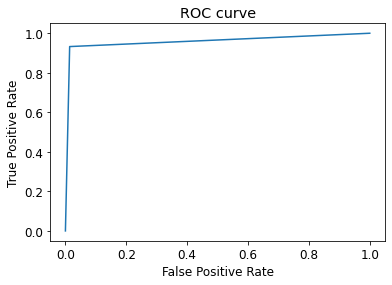

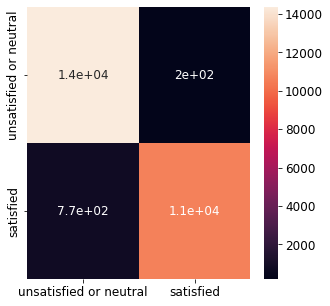

In [42]:
from keras import backend as K


def custom_mean_square_error(y_true, y_pred):
    return tf.math.reduce_mean(tf.square(y_true - y_pred))


y_train = np.array(y_train,dtype='float32')

model = Sequential()

model.add(Dense(128, input_dim=17, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam', loss=custom_mean_square_error, metrics=['accuracy'])
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss'),
    tf.keras.callbacks.TensorBoard(log_dir='logs')
]

results = model.fit(x_train,y_train,epochs=200, batch_size=8, callbacks=callbacks, validation_split=0.2)

pred = model.predict(x_test)
pred = np.around(pred)
plot_model_performance(results,pred,y_test)